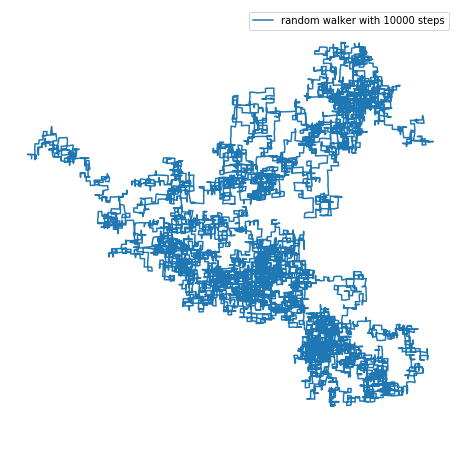

In [98]:
import matplotlib.pyplot as plt
import numpy as np


plt.ion()
x=0
y=0
data=[]
L = 10000
for i in range(L):
    rand = np.random.random()
    
    if rand>0 and rand<0.25:
        x = x+1
    if rand>0.25 and rand<0.5:
        x = x-1
    if rand>0.5 and rand<0.75:
        y = y+1
    if rand>0.75 and rand<1:
        y = y-1
    x = x+0.1*np.random.randn()
    y = y+0.1*np.random.randn()
    data.append((x,y))
    
data = np.array(data)
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.axis('off')
plt.plot(data[:,0], data[:,1], label='random walker with {} steps'.format(L))

plt.legend()




# Probability plots of random walker

In [94]:
def run_random_walker(N,Q):
    end_points = []
    for ensamble in range(Q):
        x=0
        y=0
        for walk in range(N):
            rand = np.random.random()
            if rand>0 and rand<0.25:
                x = x+1
            if rand>0.25 and rand<0.5:
                x = x-1
            if rand>0.5 and rand<0.75:
                y = y+1
            if rand>0.75 and rand<1:
                y = y-1
        x = x+0.1*np.random.randn()
        y = y+0.1*np.random.randn()
        end_points.append((x,y))

    return np.array(end_points)
    

In [113]:
Q = 1000000
N = 100
data = run_random_walker(N,Q)

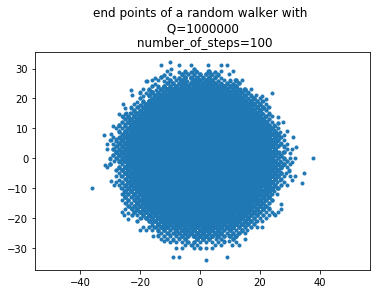

In [114]:

plt.axis('equal')
plt.title('end points of a random walker with \n Q={} \n number_of_steps={}'.format(Q,N))
plt.plot(data[:,0], data[:,1],'.')


Text(0.5, 1.0, 'histogram of the distance from origin of the end points of the RandomWalker')

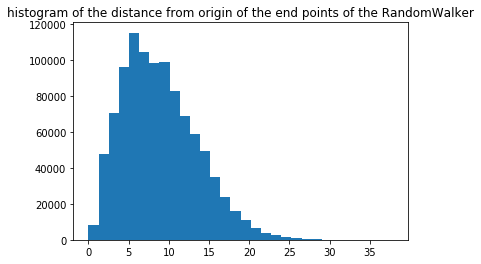

In [119]:
plt.hist((data[:,0]**2 + data[:,1]**2)**0.5, bins=30)
plt.title('histogram of the distance from origin of the end points of the RandomWalker')

Text(0.5, 1.0, 'histogram of the X position of the RandomWalke')

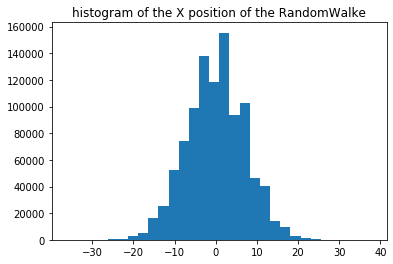

In [122]:
plt.hist(data[:,0],bins=30)
plt.title('histogram of the X position of the RandomWalke')

Text(0.5, 1.0, 'histogram of the y position of the random walker')

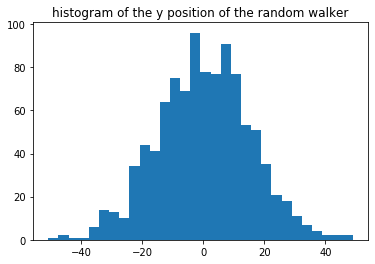

In [226]:
n,bins,pa =plt.hist(data[:,1],bins=30)
plt.title('histogram of the y position of the random walker')


In [227]:
from scipy import optimize

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

popt, _ = optimize.curve_fit(gaussian, bins[:-1], n)

array([87.38716152, -1.18030786, -5.37510685])

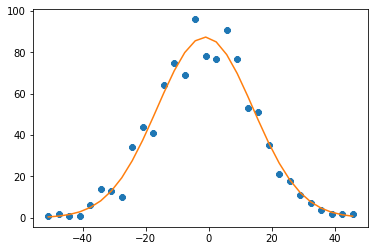

In [229]:
plt.plot(bins[:-1],n,'8')
plt.plot(bins[:-1],gaussian(bins[:-1],popt[0],popt[1],popt[2]))
popt

# Dynamic of sigma

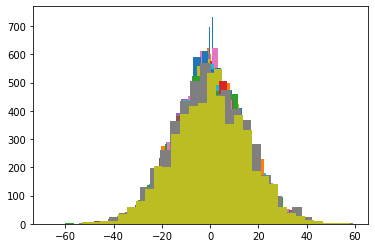

In [262]:
Q=5000
N_list = [10*i for i in range(1,50)]
std_dynamic=[]
mean_dynamic=[]
for N in N_list:
    data = run_random_walker(N,Q)
    n, bins, pa = plt.hist(data[:,0],bins=30)
    popt, _ = optimize.curve_fit(gaussian, bins[:-1], n)
    mean = popt[1]
    std = popt[2]
    std_dynamic.append((N,std))
    mean_dynamic.append((N,mean))

In [263]:
std_dynamic = np.array(std_dynamic)
mean_dynamic = np.array(mean_dynamic)

Text(0, 0.5, 'Variance')

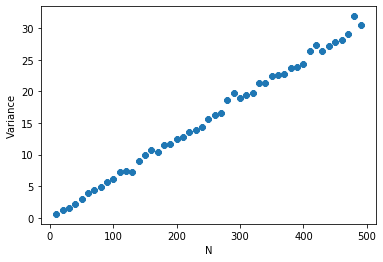

In [264]:
plt.plot(std_dynamic[:,0], np.abs(std_dynamic[:,1])**2,'8')
plt.xlabel('N')
plt.ylabel('Variance')

In [265]:
def linear_fit(x,a,b):
    return a*x + b

In [266]:
popt, _ = optimize.curve_fit(linear_fit,std_dynamic[:,0], np.abs(std_dynamic[:,1])**2)

Text(0.5, 1.0, 'Dynamic of variance')

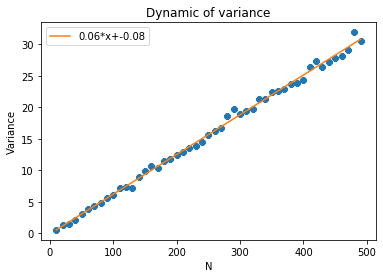

In [267]:
plt.plot(std_dynamic[:,0], np.abs(std_dynamic[:,1])**2,'8')
plt.xlabel('N')
plt.ylabel('Variance')
plt.plot(std_dynamic[:,0],linear_fit(std_dynamic[:,0],*popt), label='%3.2f*x+%3.2f'%(popt[0],popt[1]))
plt.legend()
plt.title('Dynamic of variance')

Text(0.5, 1.0, 'Dynamic of mean')

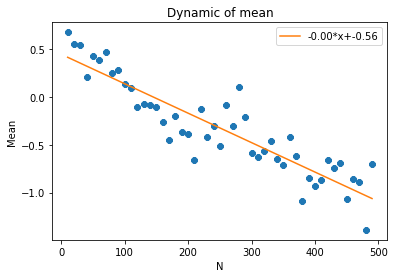

In [282]:
popt, _ = optimize.curve_fit(linear_fit,mean_dynamic[:,0], mean_dynamic[:,1])
plt.plot(mean_dynamic[:,0], mean_dynamic[:,1]+1,'8')
plt.xlabel('N')
plt.ylabel('Mean')
plt.plot(mean_dynamic[:,0],linear_fit(mean_dynamic[:,0],*popt)+1, label='%3.2f*x+%3.2f'%(popt[0],popt[1]))
plt.legend()
plt.title('Dynamic of mean')